## Bagging

In [18]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

In [5]:
# データのロード
df = sns.load_dataset('titanic')
df.dropna(inplace=True)


# x, yの準備
X = df.loc[:, (df.columns != 'survived') & (df.columns != 'alive')]
y = df['survived']


# ラベルエンコーディング
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()


# defaultはnp.arrayで返るので、pdで返るようにする
oe.set_output(transform='pandas')


# カテゴリカルデータの選択 => label encoding
cat_cols = X.select_dtypes(exclude=np.number).columns.to_numpy()
X.loc[:, cat_cols] = oe.fit_transform(X[cat_cols])
# X = oe.fit_transform(X)


# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
# 学習
clf = BaggingClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

In [7]:
# 評価
print(f"bagging AUC:{roc_auc_score(y_test,y_pred[:, 1])}")

bagging AUC:0.8846153846153846


## 一本の決定木の精度確認

In [8]:
# 単一の決定技の精度
from sklearn.tree import DecisionTreeClassifier
single_tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred_tree = single_tree.predict_proba(X_test)

print(f"sigle tree AUC:{roc_auc_score(y_test,y_pred_tree[:, 1])}")

sigle tree AUC:0.7596153846153846


バギングで多数のモデルのアンサンブルの方が精度が良い！！

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# defaultではsqrt(n)の特徴量が各モデルでランダムに選出される。
rf = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
print(f"random forest AUC:{roc_auc_score(y_test, y_pred[:, 1])}")

random forest AUC:0.9447115384615384


[0.01 0.17 0.12 0.06 0.01 0.06 0.01 0.01 0.22 0.24 0.06 0.   0.03]


<BarContainer object of 13 artists>

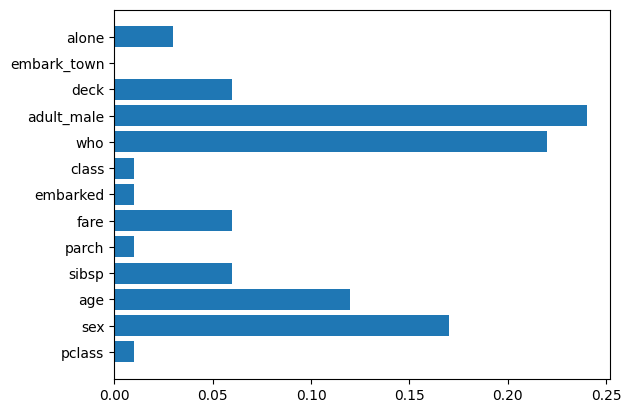

In [21]:
print(rf.feature_importances_)

plt.barh(X.columns, rf.feature_importances_)

[Text(0.5, 0.75, 'x[9] <= 0.5\ngini = 0.453\nsamples = 77\nvalue = [44, 83]'),
 Text(0.25, 0.25, 'gini = 0.195\nsamples = 37\nvalue = [7, 57]'),
 Text(0.75, 0.25, 'gini = 0.485\nsamples = 40\nvalue = [37, 26]')]

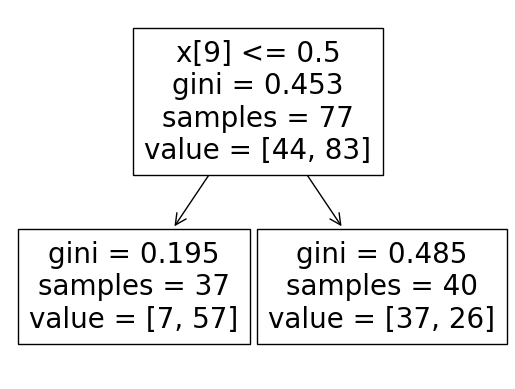

In [30]:
# ランダムフォレストの最初のモデルの描画
from sklearn.tree import plot_tree
plot_tree(rf.estimators_[0])